In [1]:
using Pkg
Pkg.activate("../..")

  Activating environment at `~/Documents/repos/nanoOpt.jl/Project.toml`


In [2]:
using LazyGrids,SpecialFunctions,Measures,LaTeXStrings,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
include("../../src/NanoOpt.jl")

In [27]:
mat1 = material(1.33^2,1.0)
mat2 = material(1.0,1.0)
λ = 632
k0 = 2π/λ
NA=0.8
d = 1.3*λ

dip = [1.0 0.0 0.0;
        1.0 0.0 0.0]

pos = [-1 0 0;
        1 0 0]*d/2

lens=lensimage(mat1,mat2,k0,NA);

In [28]:
#Dipoles = Vector{dipole}(undef,size(dip,1))

Dipols = Dipoles(mat1,k0,dip,pos)
farf = farfield(Dipols,lens.dir);

In [29]:
x = 2000*collect(range(-1.,1.,length=101))
y =  2000*collect(range(-1.,1.,length=101));
yl = [0.0]

1-element Vector{Float64}:
 0.0

In [30]:
e=efieldC(lens,farf,x,y)./(k0^2/(4π));

In [31]:
ett = real.(sum(conj(e).*e,dims=3)[:,:,1]);

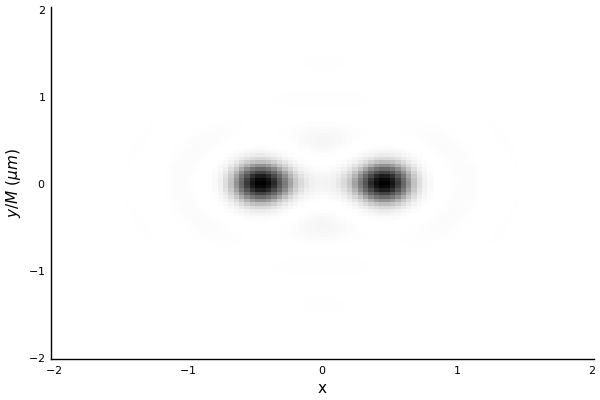

In [32]:
heatmap(x./1000,y./1000,ett',colorbar=false,xlabel="x",ylabel=L"y/M~(\mu m)",c=:Greys)

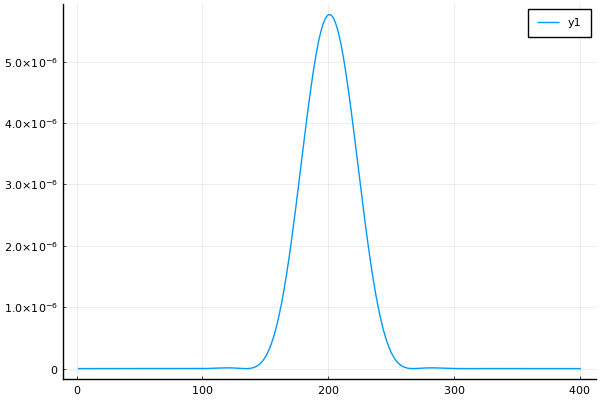

In [26]:
xl = 2000*collect(range(-1.,1.,length=401))
e=efieldC(lens,farf,xl,yl)./(k0^2/(4π))
ett = real.(sum(conj(e).*e,dims=3)[:,:,1]);
plot(ett)